In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
df_train.shape

(4209, 378)

In [11]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print("Integer Types : ")
print(df_train.select_dtypes('int64').columns)

Integer Types : 
Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=369)


In [13]:
print("Float Types : ")
print(df_train.select_dtypes('float').columns)

Float Types : 
Index(['y'], dtype='object')


In [14]:
print("Object Types : ")
print(df_train.select_dtypes(np.object).columns)

Object Types : 
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


In [15]:
df_train.select_dtypes('int64').isna().sum()

ID      0
X10     0
X11     0
X12     0
X13     0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 369, dtype: int64

In [16]:
df_train.select_dtypes('float64').isna().sum()

y    0
dtype: int64

In [17]:
df_train.select_dtypes(np.object).isna().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X8    0
dtype: int64

In [18]:
features_int = df_train.iloc[:, 10:386]

In [19]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector = selector.fit_transform(features_int)

In [20]:
selector

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
selector.shape

(4209, 356)

In [22]:
features_float = df_train.iloc[:, 1].values.reshape(-1,1)

In [23]:
selector_float = VarianceThreshold(threshold=0.0)
selector_float= selector_float.fit_transform(features_float)

In [24]:
selector_float

array([[130.81],
       [ 88.53],
       [ 76.26],
       ...,
       [109.22],
       [ 87.48],
       [110.85]])

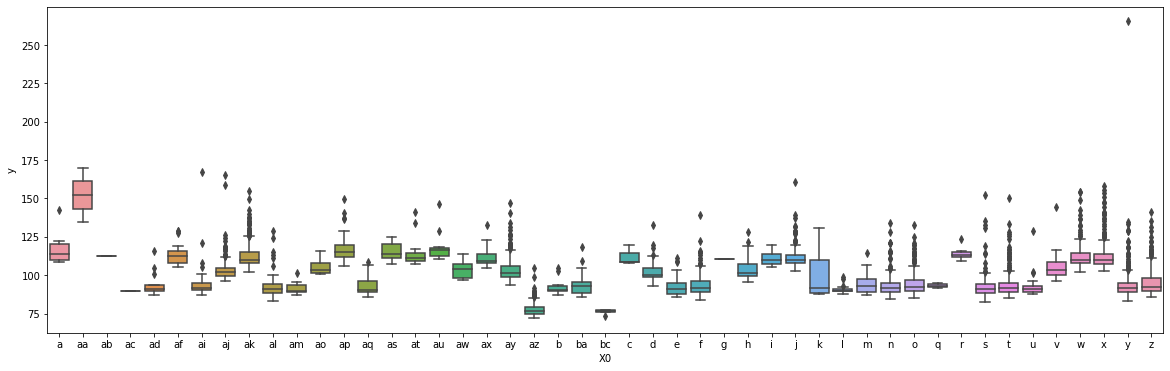

In [25]:
col_order = np.sort(df_train.X0.unique()).tolist()
plt.figure(figsize=(20,6))
sns.boxplot(x = 'X0', y = 'y', data = df_train, order=col_order)

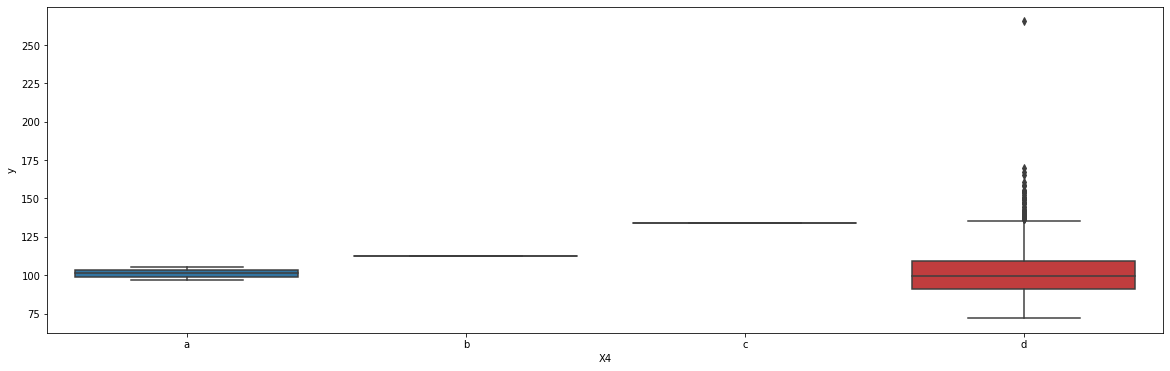

In [26]:
col_order = np.sort(df_train.X4.unique().tolist())
plt.figure(figsize=(20,6))
sns.boxplot(x = 'X4', y = 'y', data = df_train, order = col_order)

In [27]:
df_train.drop('X4', axis = 1, inplace = True)

In [28]:
df_train_label = df_train.iloc[:,1]

In [29]:
df_train_label

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [30]:
df_cat = df_train.iloc[:,2:9]

In [31]:
from sklearn.preprocessing import LabelEncoder

for f in [ "X0", "X1", "X2", "X3", "X5", "X6", "X8"]:
    le = LabelEncoder()
    df_cat[f] = le.fit_transform(df_cat[f])

In [32]:
df_cat

,X0,X1,X2,X3,X5,X6,X8
0,32,23,17,0,24,9,14
1,32,21,19,4,28,11,14
2,20,24,34,2,27,9,23
3,20,21,34,5,27,11,4
4,20,23,34,5,12,3,13
...,...,...,...,...,...,...,...
4204,8,20,16,2,0,3,16
4205,31,16,40,3,0,7,7
4206,8,23,38,0,0,6,4
4207,9,19,25,5,0,11,20


In [33]:
df_rest = df_train.iloc[:,9:385]

In [34]:
updated_train_set = df_cat.join(df_rest)

In [36]:
updated_train_set

,X0,X1,X2,X3,X5,X6,X8,X10,X11,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,24,9,14,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,28,11,14,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,27,9,23,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,27,11,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,12,3,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,0,3,16,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,0,7,7,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,0,6,4,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,0,11,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_cat_test = df_test.iloc[:, 1:9]

In [38]:
from sklearn.preprocessing import LabelEncoder

for f in [ "X0", "X1", "X2", "X3", "X5", "X6", "X8"]:
    le = LabelEncoder()
    df_cat_test[f] = le.fit_transform(df_cat_test[f])

In [39]:
df_rest_test = df_test.iloc[:,9:385]

In [40]:
df_rest_test

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
updated_test_set = df_cat_test.join(df_rest_test)

In [42]:
updated_test_set.drop('X4', axis= 1, inplace =True)

In [43]:
updated_test_set

,X0,X1,X2,X3,X5,X6,X8,X10,X11,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,26,0,22,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,9,6,24,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,0,9,9,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,31,11,13,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,30,8,12,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,1,9,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,1,9,24,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,1,3,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,1,2,16,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components=n_comp, random_state=420)

pca2_results_train = pca.fit_transform(updated_train_set)

In [45]:
pca2_results_train

array([[  0.61476492,  -0.1330098 ,  15.62446207, ...,   1.73748329,
          0.28954583,   0.35797141],
       [  0.56540707,   1.56033245,  17.9095811 , ...,  -0.13648328,
          0.76261572,  -0.36549035],
       [ 16.20171311,  12.29284565,  17.63353994, ...,  -0.48545976,
         -1.03734687,   3.9086305 ],
       ...,
       [ 29.0046606 ,  14.86090525,  -7.75332697, ...,  -1.09544487,
          1.40193071,  -0.35892905],
       [ 22.97242179,   1.68482439,  -9.03124303, ...,   0.2548363 ,
          1.2743044 ,  -1.10501902],
       [-17.2830486 ,  -9.95198118,  -3.71934907, ...,   0.28678895,
          0.43209272,  -0.7156496 ]])

In [46]:
pca2_results_train = pca.fit_transform(updated_train_set)

In [47]:
pca2_results_test = pca.transform(updated_test_set)

In [49]:
import xgboost as xgb
from sklearn import model_selection
seed = 50

In [59]:
kfold = model_selection.KFold(n_splits=  15, shuffle = True, random_state=seed)
model = xgb.XGBRegressor()
##model.fit(pca2_results_train, df_train_label)
results = model_selection.cross_val_score(model, pca2_results_train, df_train_label, cv=kfold)

In [60]:
results

array([0.4244061 , 0.38565132, 0.27286613, 0.48707614, 0.37716734,
       0.41911689, 0.46165706, 0.45195115, 0.2497026 , 0.41383974,
       0.39478326, 0.50607463, 0.42322266, 0.4697592 , 0.32927656])

In [61]:
results.mean()

0.4044367177073591

In [62]:
dtrain = xgb.DMatrix(pca2_results_train, label=df_train_label)
dtest = xgb.DMatrix(pca2_results_test)

In [80]:

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric' : 'rmse'
}

In [81]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=400,
    seed=42,
    nfold=5
    #metrics={'rmse'}
    #early_stopping_rounds=10
)

[15:55:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,71.127382,0.121494,71.135103,0.649609
1,50.363863,0.104056,50.395342,0.698344
2,35.983405,0.099983,36.031241,0.714719
3,26.108039,0.117054,26.222383,0.771809
4,19.432245,0.123489,19.699461,0.850837
...,...,...,...,...
395,1.962251,0.135621,10.222831,0.945218
396,1.961765,0.135792,10.222922,0.945358
397,1.961445,0.135720,10.222922,0.945307
398,1.961215,0.135766,10.223146,0.945263


In [83]:
train_m = xgb.train(
    params,
    dtrain,
    num_boost_round=400
)

[15:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [84]:
test_results = train_m.predict(dtest)

In [85]:
test_results

array([ 84.408516,  91.149   ,  79.10355 , ...,  94.24627 , 111.34144 ,
        91.294304], dtype=float32)

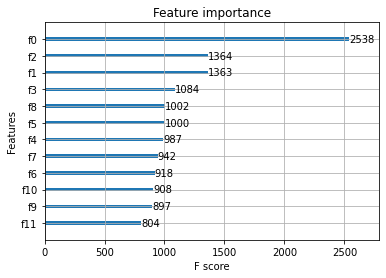

In [86]:
xgb.plot_importance(train_m)